<a href="https://colab.research.google.com/github/DevanshA2511/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -**           Devansh Saini


# **Project Summary -**

* The hotel industry has been rapidly growing over the years and with the increasing demand, there is a need for analyzing data that can provide insights to help improve the overall performance of hotels. The dataset used in this project contains information about bookings in two hotels, one city hotel and one resort hotel. The data includes various features such as hotel type, booking dates, lead time, room types, customer demographics, and reservation status, among others.

* The primary objective of this project is to perform exploratory data analysis (EDA) on the given dataset to gain insights into the factors that influence hotel bookings, cancellations, and revenues. The analysis includes examining the relationship between different variables and identifying patterns that can help in improving the hotel’s performance.

* The first step in the EDA process is to clean the data by removing missing values, duplicates, and irrelevant columns. After cleaning the data, the distribution of the variables was analyzed.

* THen further going through Data Vizualization Data, Distribution Analysis ,Exploring Booking Patterns ,Demographic Insights,Cancellation Analysis
 and Revenue Analysis

* The EDA process will yield insights into the complex interplay of factors influencing hotel bookings and revenue. These insights can guide strategic decision-making in areas such as marketing, pricing, customer service, and resource allocation. By identifying trends and patterns within the dataset, the project aims to empower the hotels to enhance their performance, improve guest satisfaction, and ultimately thrive in the competitive hospitality industry.

* This EDA project serves as a crucial foundation for data-driven decision-making within the hotel industry, offering a roadmap for continual improvement and competitiveness in a rapidly evolving market.

# **GitHub Link -**

GitHub Link : https://github.com/DevanshA2511/Hotel-Booking-Analysis-EDA.git

# **Problem Statement**


***1. Exploring and analysing the data to discover important factors that govern the bookings.***

***2. Is it possible to predict whether a booking will be cancelled considering the following elements lead time, customer demographics, and booking details?***

***3. What are the factors that contribute to the variation of average daily rate (ADR) with respect to hotel type, seasonality, and customer type.***

***4. What are the periods in which the bookings are maximum according to weekdays, weekends, months etc.***

#### **Define Your Business Objective?**

**1.** Identifying the most popular hotel types and room types for guests, and optimizing pricing and availability for those options to increase revenue.

**2.** Understanding which market segments are the most lucrative for the hotels, and tailoring marketing efforts towards those segments to increase bookings.

**3.** Analyzing customer feedback data to identify common complaints or issues and addressing them to improve customer satisfaction and increase the likelihood of repeat bookings.

**4.** Identifying the most effective channels for distributing hotel bookings (e.g. online travel agencies, direct bookings, etc.) and optimizing marketing efforts for those channels to increase bookings.

**5.** Analyzing booking patterns to identify trends and opportunities for seasonal promotions or package deals to attract more bookings during slower periods.

**6.** Monitoring cancellation rates for individual hotels or room types to identify potential issues or areas for improvement in terms of booking policies or customer service.

**7.** Analyzing the distribution of booking lead times to identify patterns in how far in advance guests tend to book, and optimizing pricing and availability to encourage guests to book earlier and reduce last-minute cancellations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy import stats
!pip install squarify -qqq
import squarify


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive #mounting gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/data /Hotel Bookings.csv" #setting file path
df = pd.read_csv(path) #storing the data into a data frame
hotel_bookings_df = df.copy() #creating a copy to work on the data

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns', None) #setting the columns to max display to observe all the columns
hotel_bookings_df.head() #first 5 rows of dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_bookings_df.tail() #last 5 rows of data set

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row_count = hotel_bookings_df.shape[0]  # Returns number of rows
print(f"No. of Rows : {row_count}")
col_count = hotel_bookings_df.shape[1]  # Returns number of columns
print(f'No. of Columns : {col_count}')

No. of Rows : 119390
No. of Columns : 32


### Dataset Information

In [ ]:
# Dataset Info
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = sum(hotel_bookings_df.duplicated())
print(f'No. of duplicate values in dataset are {duplicates}')


No. of duplicate values in dataset are 31994


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
total_null = hotel_bookings_df.isna().sum().sum()
print(f'Total Null values present are : {total_null}')
hotel_bookings_df.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Total Null values present are : 129425


,Columns,Null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


<Axes: >

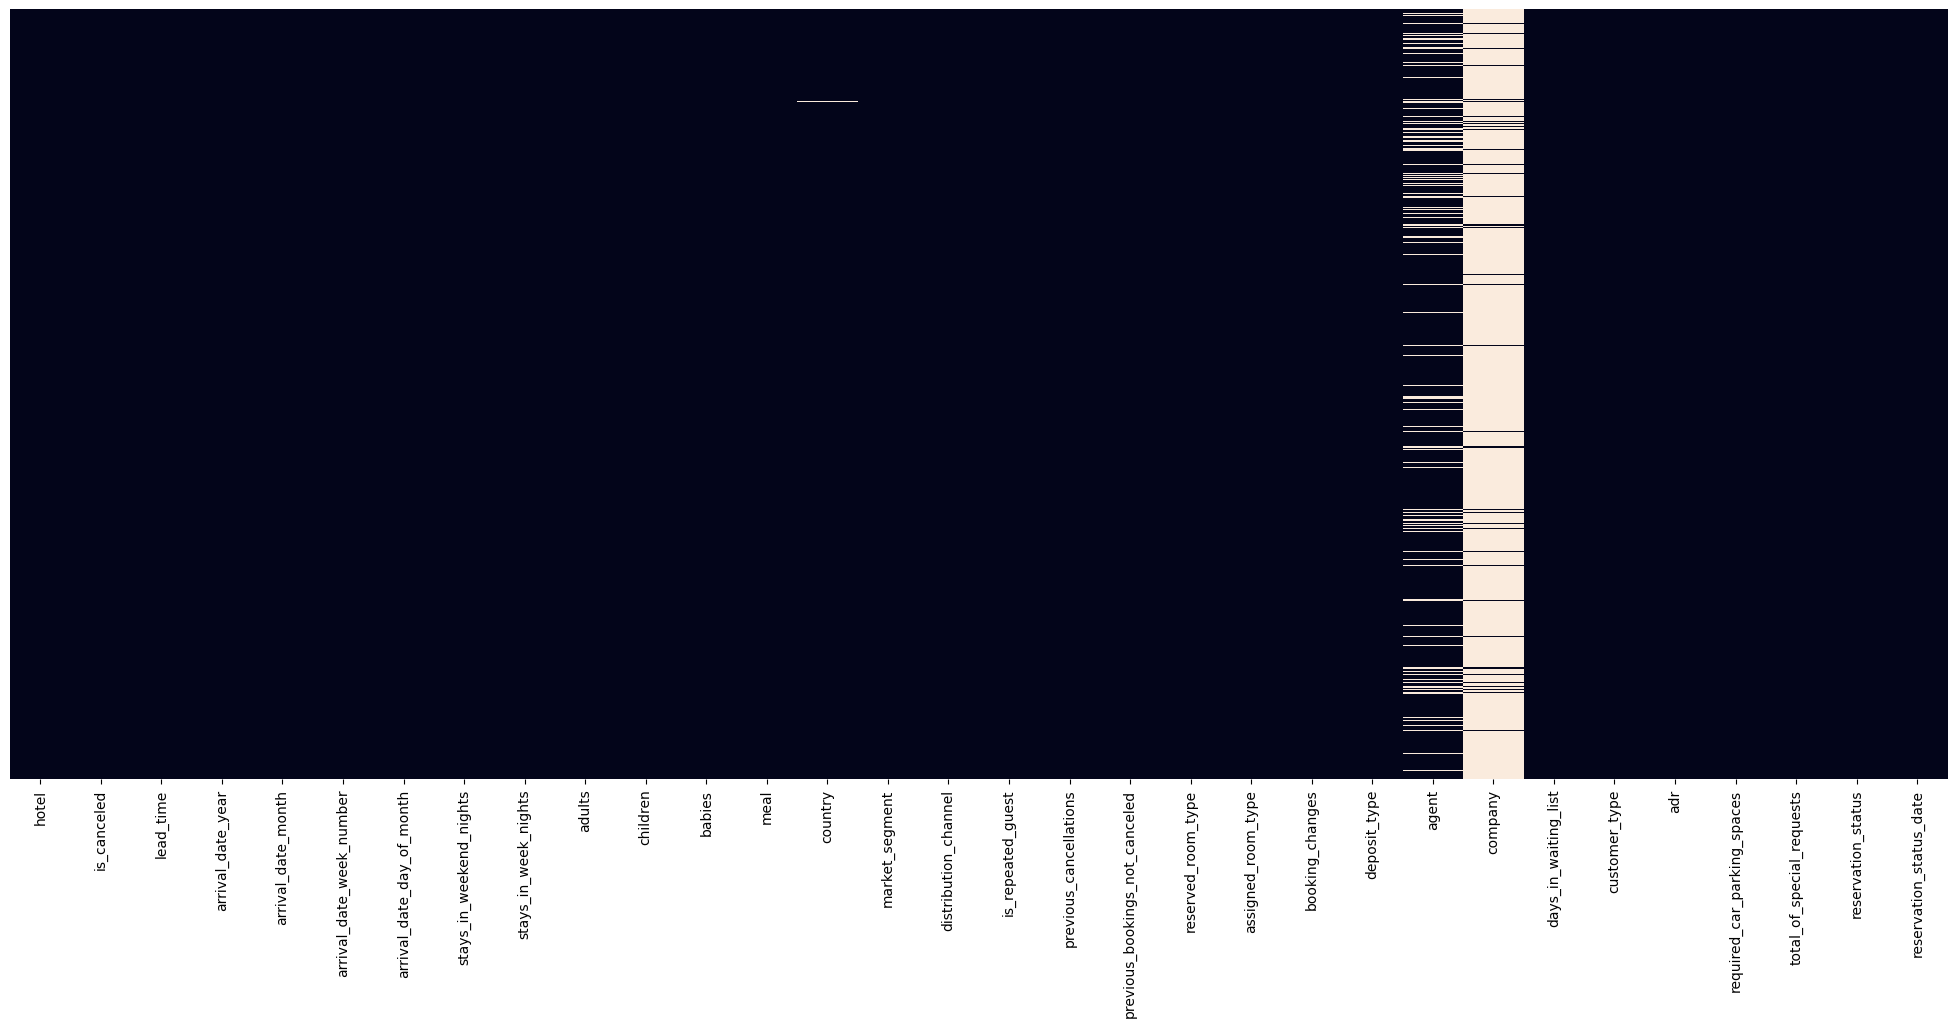

In [ ]:
# Visualizing the missing values through a heat map
plt.figure(figsize=(25, 10))
sns.heatmap(hotel_bookings_df.isnull(),cbar = False, yticklabels = False)

### What did you know about your dataset?

*From the above heatmap and data analysis i can say that:*
1. There are 119390 rows and 32 coloumns in the dataset.

2. A total of 31994 ***duplicate*** values are present in the dataset.

3. A total of 129425 ***Null*** values are present in the dataset.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(hotel_bookings_df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Dataset Describe
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)*

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0).*

3. **lead_time** : *Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.*

4. **arrival_date_year** : *Year of arrival date.*

5. **arrival_date_month** : *Month of arrival date.*

6. **arrival_date_week_number**: *Week number of year for arrival date.*

7. **arrival_date_day_of_month** : *Day of arrival date.*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.*

10. **adults** : *Number of adults.*

11. **children** : *Number of children.*

12. **babies** : *Number of babies.*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages.*

14. **country** : *Country of origin.*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0).*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking.*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking.*

20. **reserved_room_type** :*Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.*

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking.*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.*

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer.*

27. **customer_type** : *Type of booking, assuming one of four categories.*

28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer.*

30. **total_of_special_requests** : *Number of special requests made by the customer (e.g. twin bed or high floor).*

31. **reservation_status** : *Reservation last status, assuming one of three categories.*

* **Canceled** – *booking was canceled by the customer.*
* **Check-Out** – *customer has checked in but already departed.*
* **No-Show** – *customer did not check-in and did inform the hotel of the reason why.*
32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.*

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable. Columns with specific categories.
category_col = list(set(hotel_bookings_df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns) - set(hotel_bookings_df.describe()))

for label in category_col:
  print(f'Unique values in column {label} are:, {(hotel_bookings_df[label].unique())}')

Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


## 3. ***Data Wrangling***

### Data Wrangling Code

**Handling Duplicate Values**

In [ ]:
# Removing duplicate values
hotel_bookings_df = hotel_bookings_df.drop_duplicates()

In [ ]:
# Dataset shape after removing duplicate values
hotel_bookings_df.shape

(87396, 32)

**Handling Null Values**


In [ ]:
# Filling/replacing null values with 0.
col_null = ['agent','children','company']
for col in col_null:
  hotel_bookings_df[col].fillna(0,inplace = True)

In [ ]:
# Replacing Country column null values with 'others'.
hotel_bookings_df['country'].fillna('others',inplace = True)

In [ ]:
# All Null values Successfully removed.
hotel_bookings_df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


**Adding New Columns**

In [ ]:
# Adding a column for total guest per booking and total duration of stay of an old customer.
hotel_bookings_df['total_guest'] = hotel_bookings_df['children'] + hotel_bookings_df['adults'] + hotel_bookings_df['babies']
hotel_bookings_df['total_time'] = hotel_bookings_df['stays_in_week_nights'] + hotel_bookings_df['stays_in_weekend_nights']

**Removing Invalid Data**


In [ ]:
# Checking where the total guests is zero. Which will be deemed as an invalid booking.
len(hotel_bookings_df[hotel_bookings_df['adults'] + hotel_bookings_df['babies'] + hotel_bookings_df['children'] == 0])

166

In [ ]:
# Removing the 166 invalid bookings.
hotel_bookings_df.drop(hotel_bookings_df[hotel_bookings_df['adults'] + hotel_bookings_df['babies'] + hotel_bookings_df['children'] == 0].index, inplace = True)

In [ ]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

**Changing Data Types**

In [ ]:
# Changing data type of children and agent column data type to int64 for proper usage
hotel_bookings_df['children'] = hotel_bookings_df['children'].astype(int)
hotel_bookings_df['agent'] = hotel_bookings_df['agent'].astype(int)

In [ ]:
hotel_bookings_df[['children','agent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   children  87230 non-null  int64
 1   agent     87230 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


**Seprating Datasets on basis of type of Hotel.**

In [ ]:
resort_hotel_df = hotel_bookings_df[hotel_bookings_df['hotel'] == 'Resort Hotel']
city_hotel_df = hotel_bookings_df[hotel_bookings_df['hotel'] == 'City Hotel']

In [ ]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  int64  
 11  babies                          87230 non-null  int64  
 12  meal                           

### What all manipulations have you done and insights you found?

**1.** *I handled all the duplicate values by removing the duplicate values by using the function .drop_duplicate()*

**2.** *Handling all the null values as required*
1. *Filling **0** in missing values of coloumn of agents and company.*
2. *Putting **Others** in issing values of country assuming that the customer's cuntry wasn't listed or known*
3. *For Childrens column filling **0** assuming no child was with the customer*

**3.** *Removing useless 166 invalid data found where the number of guets are zero using .drop*

**4.** *Adding new columns 'total_guests' to take in account the number of total guests per booking*

**5.** *Adding a new column 'total_time' showing the total time spent by the guests during weekdays and weekends in the hotel*

**6.** *Changing data types of children and agent column from float to int64 for making operations simpler and suitable.*

**7.** *Making seprate datasets for Resort Hotels and City Hotels for making the comparison of data during analysis easier to perform.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# ***Univariate Analysis***

#### Chart - 1: Which type of Hotel has more number of bookings?

Text(0.5, 0, 'Hotel Types')

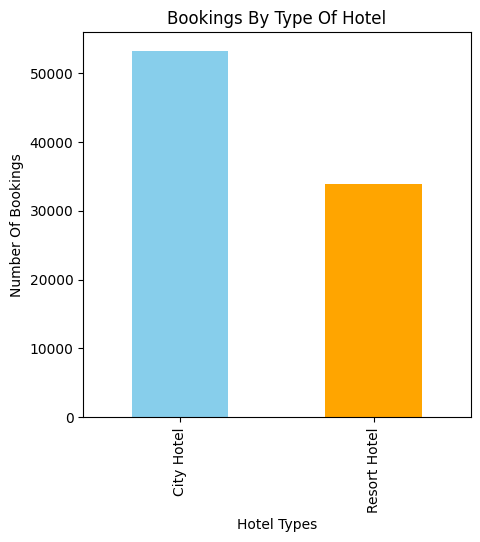

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(5,5))
hotel_type = hotel_bookings_df['hotel'].value_counts()
hotel_type.plot(kind='bar',color=['skyblue', 'orange'])
plt.title('Bookings By Type Of Hotel')
plt.ylabel('Number Of Bookings')
plt.xlabel('Hotel Types')

##### 1. Why did you pick the specific chart?

Bar plots show distribution of frequencies of values comprehensively and make them easy to compare the data and make it easier to gather insights from it.

##### 2. What is/are the insight(s) found from the chart?

City Hotels have more number of bookings in comparisonn to resort hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insight will help th bussiness to improve the number of bookings in resort hotls by taking required steps.
* The business will be able to alot resources effeciently to the city hotels and resort hotels.
* As the city hotels they are having the larger number of bookings more resourses can be provided to the resort hotels to improve customer experience there and increse the bookings in resort hotels.

#### Chart - 2: Which Country does the most guests come from?

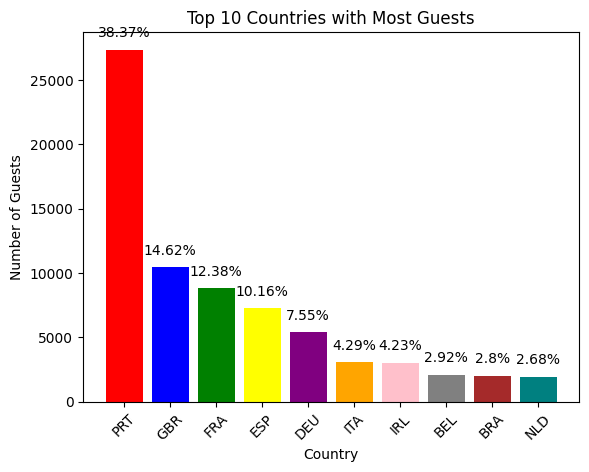

In [ ]:
# Chart - 2 visualization code
# Creating a new dataframe with top 10 countries
top_countries = hotel_bookings_df['country'].value_counts().nlargest(10).to_frame().reset_index()
top_countries.columns = ['country', 'count']
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'brown', 'teal']

# Plotting the bar chart
plt.bar(top_countries['country'], top_countries['count'], color=colors)

# Adding percentage labels to the chart
total = sum(top_countries['count'])
for i, count in enumerate(top_countries['count']):
    plt.text(i, count+1000, str(round((count/total)*100,2))+'%', ha='center')

# Adding chart title and labels
plt.title('Top 10 Countries with Most Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

##### 1. Why did you pick the specific chart?

Bar plots show distribution of frequencies of values comprehensively and make them easy to compare the data and make it easier to gather insights from it

##### 2. What is/are the insight(s) found from the chart?

1. The majority of guests are from Portugal, followed by the UK and France.

2. The percentage of guests from the top 3 countries (Portugal, UK, and France) account for over 50% of all guests.

3. The percentage of guests from the top 10 countries account for over 80% of all guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. The gained insights from the chart can help Creating a positive business impact for the hotel by providing useful information for marketing and sales strategies. For instance, the hotel can use this information to target marketing campaigns towards guests from the top countries and also make sure to provide the best possible experience for guests from these countries to encourage repeat bookings.

2. However, if the hotel solely focuses on these top 10 countries and does not consider guests from other countries, it may lead to negative growth in terms of limiting potential growth opportunities and revenue streams. Therefore, it is important for the hotel to also consider guests from other countries and try to attract a diverse range of guests.

#### Chart - 3: How is the lead time changing with bookings?

Text(-12.430555555555555, 0.5, 'Count')

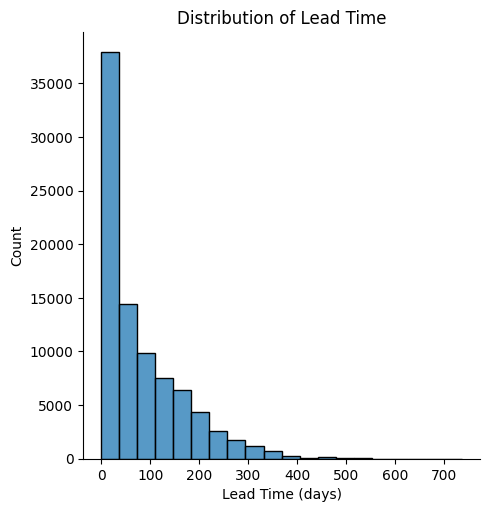

In [ ]:
# Chart - 3 visualization code
# Ploting raw data of lead_time
sns.displot(x="lead_time", data=hotel_bookings_df, bins=20)
plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Count")


In [ ]:
# Removing outliers from data
# Calculating z-score of lead_time column
z_scores = np.abs((hotel_bookings_df["lead_time"] - hotel_bookings_df["lead_time"].mean()) / hotel_bookings_df["lead_time"].std())

# Keeping only rows with z-score less than 3
lead_time_df = hotel_bookings_df[z_scores < 3]


Text(-12.430555555555555, 0.5, 'Count')

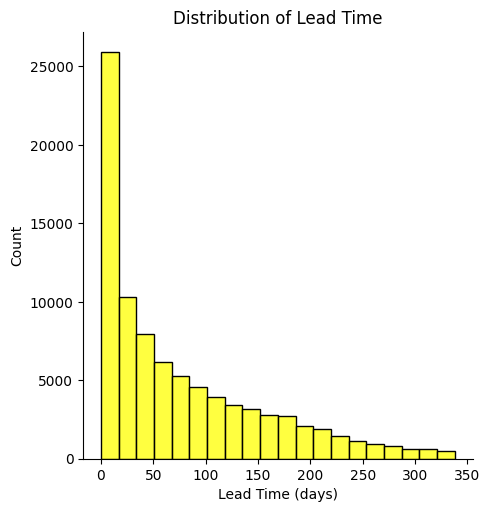

In [ ]:
# Ploting the clean data
sns.displot(x="lead_time", data=lead_time_df, bins=20,color='yellow')
plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Count")

##### 1. Why did you pick the specific chart?

The distribution plot is a common type of chart used to visualize the distribution of a numerical variable, in this case, the lead time variable. By using a histogram, this chart shows the frequency distribution of lead time data in bins, where each bin represents a range of values. The height of each bar represents the count of observations falling within that bin.

##### 2. What is/are the insight(s) found from the chart?

1. From the chart, we can see the distribution of lead time, which is the number of days between the booking date and the arrival date.
2. The majority of the bookings have a lead time of less than 100 days, with the highest concentration of bookings having a lead time of around 0-25 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight gained from this chart could be useful for revenue management strategies, such as adjusting prices based on the time remaining until arrival.

#### Chart - 4: How is the Average Daily Rate variating with bookings?

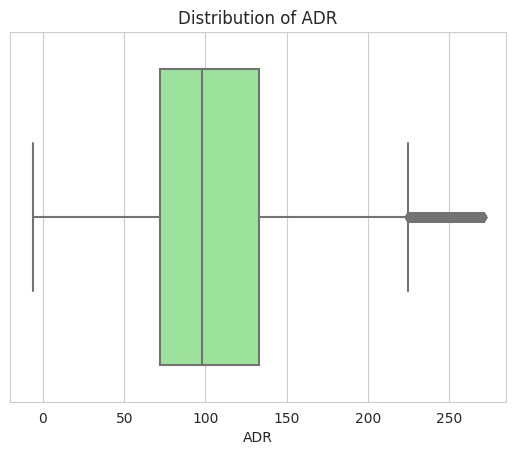

In [ ]:
# Chart - 4 visualization code

# Calculating z-score of adr column
z_scores = np.abs((hotel_bookings_df["adr"] - hotel_bookings_df["adr"].mean()) / hotel_bookings_df["adr"].std())

# Creating a box plot with z-score filtering within the function
sns.boxplot(x="adr", data=hotel_bookings_df[z_scores < 3], color="lightgreen")

plt.title("Distribution of ADR")
plt.xlabel("ADR")

plt.show()

##### 1. Why did you pick the specific chart?

* The boxplot is an effective way to display the distribution of data and identify any potential outliers. By using z-scores to remove extreme values, the boxplot can focus on the majority of the data and provide a clearer picture of the distribution.

##### 2. What is/are the insight(s) found from the chart?

* The boxplot shows the distribution of ADR (Average Daily Rate) values for the hotels. The plot shows that the median ADR value is around 100, with a range of values from approximately 0 to 250

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The plot provides valuable information to hotel management to understand the pricing strategy of the hotels and the distribution of ADR values.

#### Chart - 5 What are the meal types guests add the most?

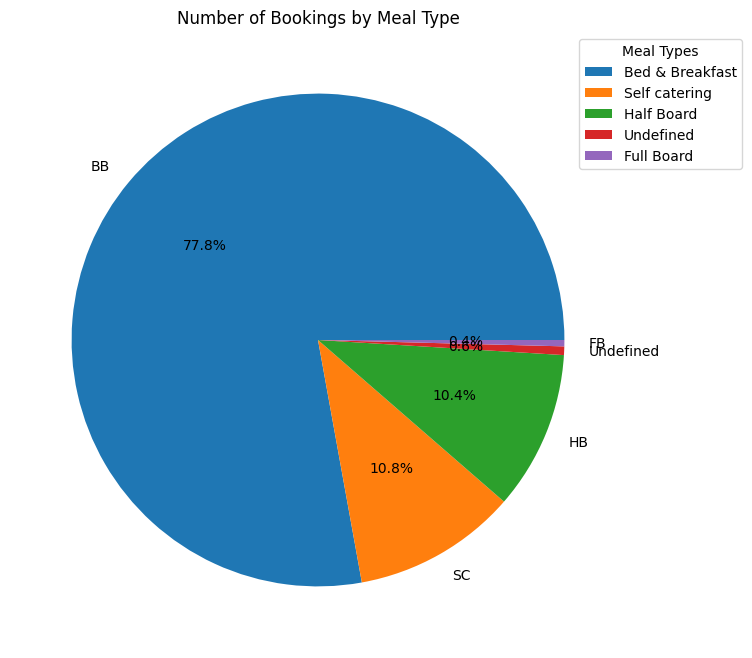

In [ ]:
# Chart - 5 visualization code
# Counting the occurrences of each meal type
meal_counts = hotel_bookings_df["meal"].value_counts()

# Setting up the figure size for the plot
plt.figure(figsize=(8, 8))

# Creating a pie chart with meal counts and labels, and display percentages
plt.pie(meal_counts, labels=meal_counts.index, autopct="%1.1f%%")

# Setting title for the pie chart
plt.title("Number of Bookings by Meal Type")

# Adding a legend to the plot, positioning it outside of the chart area
plt.legend(title="Meal Types", labels=["Bed & Breakfast",'Self catering', "Half Board","Undefined","Full Board"], loc="upper right", bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

* Since Pie charts represent data that is categorized into a few distinct groups or segments, where the relative size of each segment is important to understand.

##### 2. What is/are the insight(s) found from the chart?

* Bed and breakfast is the most ordered meal type with bookings.
* Full Board services is the least used followed by half board and self catering.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding guests' preferences and behaviors related to dining can help hotels tailor their offerings to better meet guest needs and preferences, as well as optimize pricing and marketing strategies to increase bookings and revenue.

#### Chart - 6: What is the most used distribution channel?

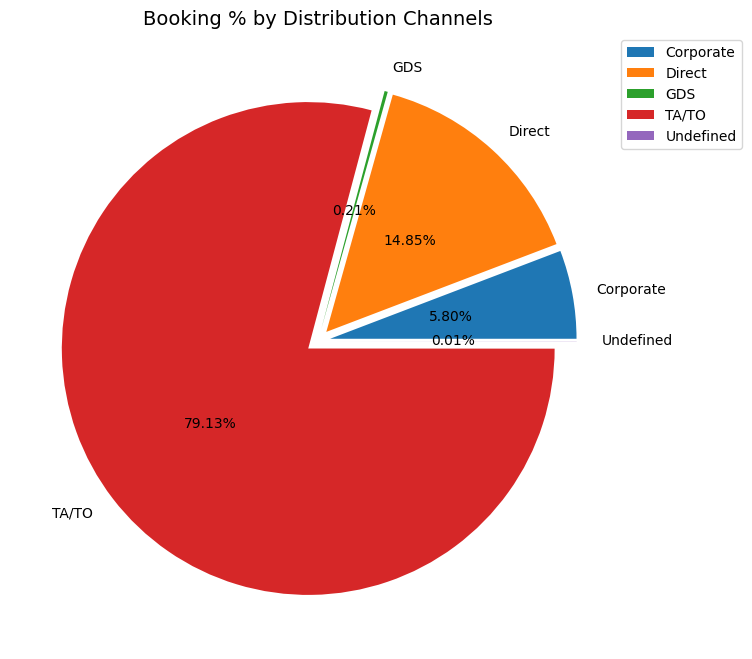

In [ ]:
# Chart - 6 visualization code

# Grouping the data by 'distribution_channel'
group_by_dc = hotel_bookings_df.groupby('distribution_channel')

# Calculating the percentage of bookings for each distribution channel
booking_percentages = round((group_by_dc.size() / hotel_bookings_df.shape[0]) * 100, 2)

# Creating a DataFrame to hold the calculated percentages
d1 = pd.DataFrame(booking_percentages).reset_index().rename(columns={0: 'Booking_%'})

# Setting up the figure size
plt.figure(figsize=(8, 8))

# Extracting data for the pie chart
data = d1['Booking_%']
labels = d1['distribution_channel']
explode = [0.05] * len(data)  # To create an exploded effect for the pie chart

# Creating the pie chart
plt.pie(x=data, autopct="%.2f%%", explode=explode, labels=labels, pctdistance=0.5)

# Setting title and legend
plt.title("Booking % by Distribution Channels", fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()

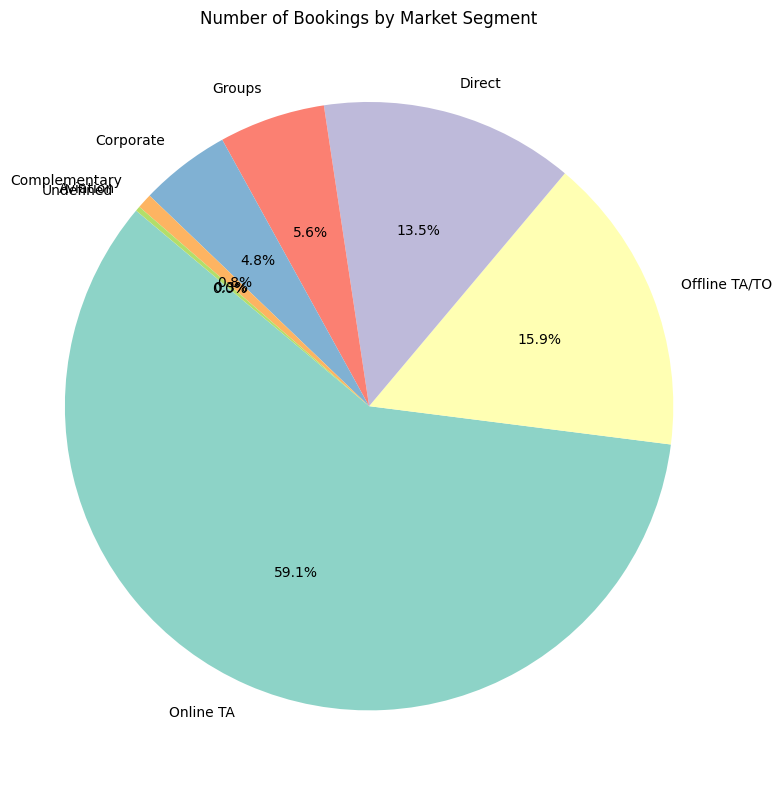

In [ ]:
# Selecting the relevant columns
market_segment_counts = hotel_bookings_df['market_segment'].value_counts()

# Setting up the figure size
plt.figure(figsize=(8, 8))

# Creating a pie chart
plt.pie(market_segment_counts, labels=market_segment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Setting title
plt.title('Number of Bookings by Market Segment')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Since Pie charts represent data that is categorized into a few distinct groups or segments, where the relative size of each segment is important to understand.

##### 2. What is/are the insight(s) found from the chart?

* Online Travel Agents (OTAs) account for the largest share of hotel bookings: If the OTA channel is generating the majority of bookings, the hotel could consider investing in marketing campaigns and partnerships with OTAs to increase visibility and attract more bookings. Alternatively, they could explore ways to incentivize guests to book directly through their website or via other channels.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The chart provides a visual representation of the distribution of hotel bookings by distribution channel, which can be useful for understanding the effectiveness of different marketing and distribution strategies and informing decisions related to pricing, promotion, and partnerships.

#### Chart - 7: Which agent is making the most number of bookings?

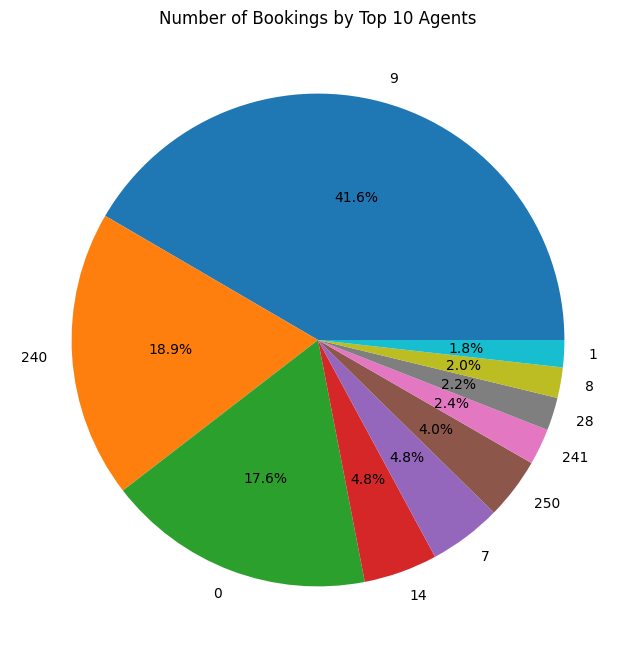

In [ ]:
# Chart - 7 visualization code
fig, ax = plt.subplots(figsize=(8,8))

# Grouping data by agent and count the number of bookings
agent_bookings = hotel_bookings_df.groupby('agent')['is_canceled'].count().reset_index(name='bookings')

# Sorting dataframe by number of bookings and select top 10 agents
agent_bookings = agent_bookings.sort_values('bookings', ascending=False).head(10)

# Creating a pie chart
ax.pie(agent_bookings['bookings'], labels=agent_bookings['agent'], autopct='%1.1f%%')
ax.set_title("Number of Bookings by Top 10 Agents")

# Display chart
plt.show()

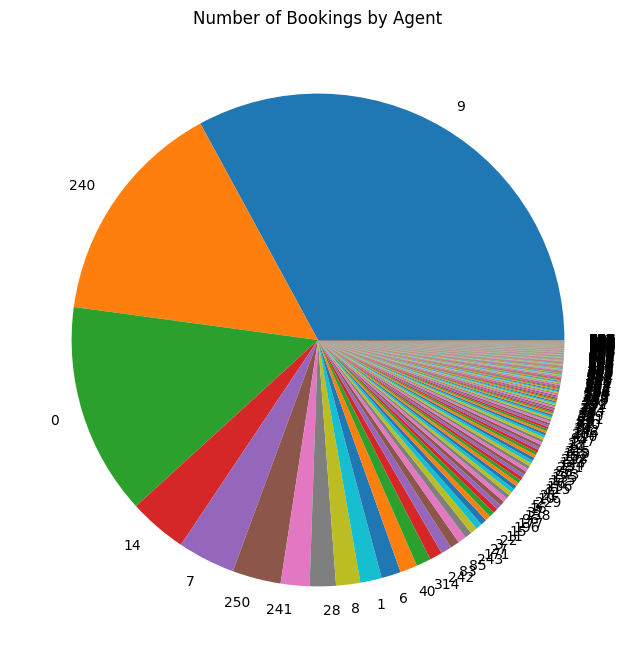

In [ ]:
# Chart - 7 visualization code
# Creating figure and axis objects
fig, ax = plt.subplots(figsize=(8,8))

# Grouping data by agent and count the number of bookings
agent_bookings = hotel_bookings_df.groupby('agent')['is_canceled'].count().reset_index(name='bookings')

# Sorting dataframe by number of bookings
agent_bookings = agent_bookings.sort_values('bookings', ascending=False)

# Creating a pie chart
ax.pie(agent_bookings['bookings'], labels=agent_bookings['agent'])
ax.set_title("Number of Bookings by Agent")

# Display chart
plt.show()

##### 1. Why did you pick the specific chart?

Since Pie charts represent data that is categorized into a few distinct groups or segments, where the relative size of each segment is important to understand.

##### 2. What is/are the insight(s) found from the chart?

Agent number 9 has the most ammount of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top 10 agents are responsible for a significant proportion of the bookings. This implies that the hotel should focus on building and maintaining strong partnerships with these agents to ensure continued business.

#### Chart - 8: Monthly pattern of guets arrival which month has the most and least bookings?


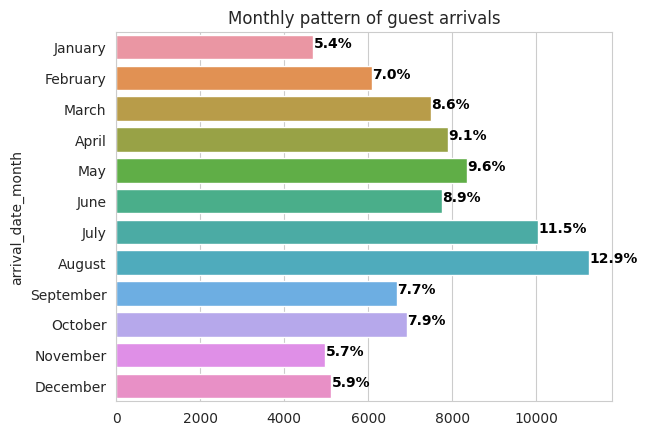

In [ ]:
# Chart - 8 visualization code

# Defining the order of the months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Grouping data by arrival month and count the number of bookings
month_counts = hotel_bookings_df.groupby('arrival_date_month')['hotel'].count().loc[months]

# Calculating the percentage of total bookings for each month
month_percentages = month_counts / month_counts.sum() * 100

# Creating the bar chart
sns.set_style("whitegrid")
sns.set_palette("husl")
ax = sns.barplot(x=month_counts.values, y=month_counts.index, orient='h')
plt.title('Monthly pattern of guest arrivals')

# Adding percentages to each bar
for i, v in enumerate(month_counts.values):
    ax.text(v + 10, i, f'{month_percentages[i]:.1f}%', color='black', fontweight='bold')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar Plot helps us understand the varience of the data and also shows clearly the maximum and minimum values.

##### 2. What is/are the insight(s) found from the chart?

* The above chart shows that the bookings are most during the months of June July and most in August.

* Also the chart shows a steady decline in number of bookings after August.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The chart shows that the summer months of June, July, and August are the busiest for hotel bookings, followed by the spring and fall months of March, April, May, September, and October. The winter months of November through February have the lowest number of bookings. This indicates a strong seasonality in the hotel industry, which can be useful for planning staffing levels, marketing campaigns, and revenue management strategies.



#### Chart - 9: Cancellations made for diffrent room types.


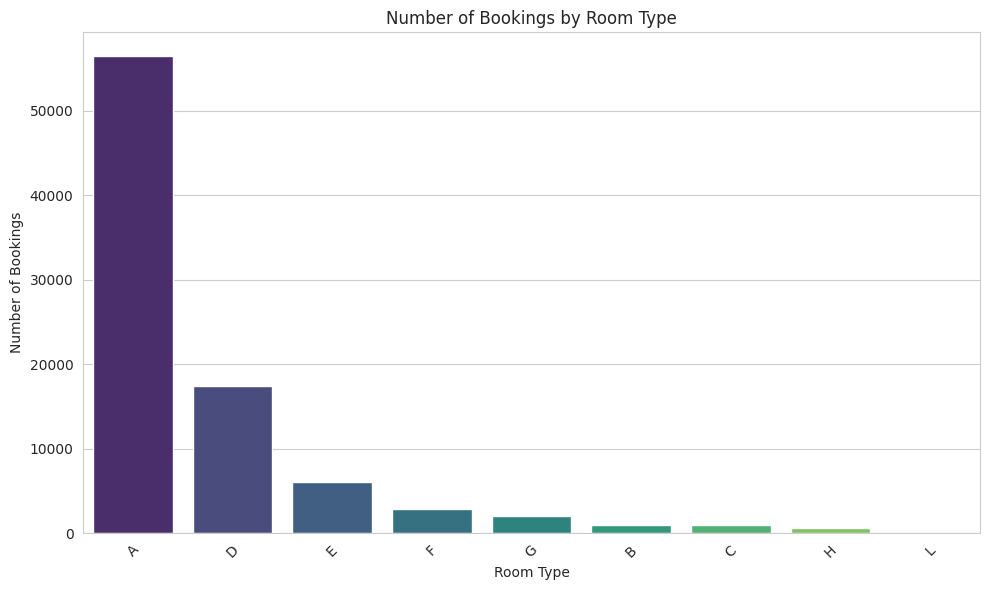

In [ ]:
# Chart - 9 visualization code

# Selecting the relevant columns
room_type_counts = hotel_bookings_df['reserved_room_type'].value_counts()

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Creating a bar plot
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')

# settinglabels and title
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Room Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar Plot helps us understand the varience of the data and also shows clearly the maximum and minimum values.

##### 2. What is/are the insight(s) found from the chart?

* A D E type of rooms have the most number of bookings

* C H L type of rooms have least number of bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Popular room types wwhich are higher in demand those rooms shouldd have more availability and the bussiness can increase their revenue on them.
* Less popular room types could benefit from targeted promotions or incentives to attract more bookings.
* Certain room types are consistently less booked, it might warrant investigation into potential reasons. It could be due to factors like pricing, room quality, or location.



# ***Bivariate Analysis***

#### Chart - 10: Duration of stay in hotels?

In [ ]:
# Checking for how long people stay in Resort hotels
resort_hotel_df['total_time'].value_counts()

1     6899
7     5675
2     4921
3     4285
4     3955
5     2561
6     1625
10     884
14     771
8      700
9      581
0      360
11     291
12     138
13      93
21      45
15      32
28      31
16      18
18      18
17      12
25      12
19      10
22       6
35       5
30       5
42       4
26       3
23       3
29       3
56       2
60       1
45       1
69       1
46       1
27       1
33       1
20       1
38       1
Name: total_time, dtype: int64

In [ ]:
# Checking for how long people stay in City hotels
city_hotel_df['total_time'].value_counts()

3     13542
2     10813
1     10270
4      9610
5      4168
7      1845
6      1638
8       362
0       231
9       198
10      188
14       88
11       76
12       58
13       40
15       37
16       15
20       13
19       12
29       10
21       10
17        8
30        8
22        6
24        6
18        6
27        3
26        3
28        3
23        2
25        2
48        1
33        1
34        1
Name: total_time, dtype: int64

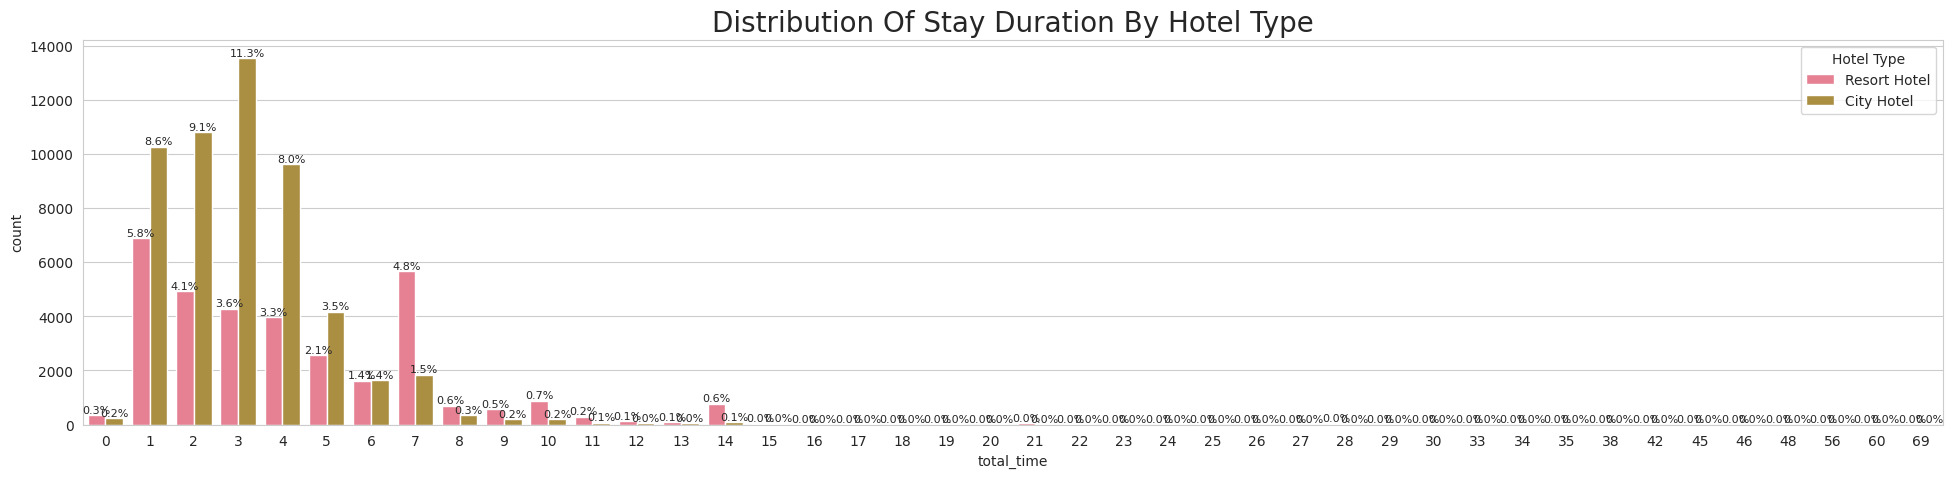

In [ ]:
# Chart - 10 visualization code
# Creating a new column 'hotel_type' to identify hotel type
hotel_bookings_df['hotel_type'] = hotel_bookings_df['hotel'].apply(lambda x: 'Resort Hotel' if x == 'Resort Hotel' else 'City Hotel')

# Plotting graph to visualize and also show percentage distribution
plt.figure(figsize=(24,5))
total = float(len(df))
ax = sns.countplot(x=hotel_bookings_df['total_time'], hue=hotel_bookings_df['hotel_type'], data=hotel_bookings_df)
plt.title('Distribution Of Stay Duration By Hotel Type', fontsize=20)
plt.legend(title='Hotel Type', loc='upper right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom',fontsize=8)
plt.show()


##### 1. Why did you pick the specific chart?

* Since the count plot helps us to visualize and compare the two variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

* The chart indicates that the majority of guests at both types of hotels stay for one or two nights, with a slight preference for City Hotels. However, the percentage of guests staying for longer periods, such as four to seven nights or more than seven nights, is higher for Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the chart can help hotels understand their guests' behaviors and preferences better and make data-driven decisions to improve their business strategies.

#### Chart - 11: When are bookings made the most durinng the week?

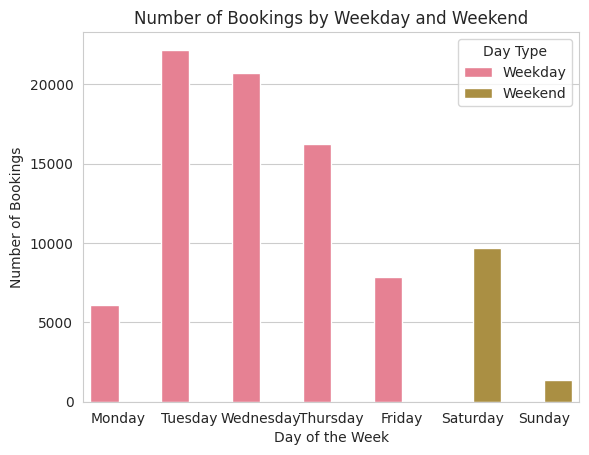

In [ ]:
# Chart - 11 visualization code
# Calculating the number of bookings for each day of the week
weekday_bookings = hotel_bookings_df.groupby('stays_in_week_nights')['is_canceled'].count().reset_index(name='bookings')

# Creating a dictionary to map the weekday number to the weekday name
weekday_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# Maping the weekday number to the weekday name
weekday_bookings['weekday'] = weekday_bookings['stays_in_week_nights'].map(weekday_dict)

# Creating a new column to indicate whether the day is a weekday or weekend
weekday_bookings['day_type'] = np.where(weekday_bookings['stays_in_week_nights'] < 5, 'Weekday', 'Weekend')

# Calculating the total number of bookings
total_bookings = weekday_bookings['bookings'].sum()

# Creating a bar plot
sns.barplot(x='weekday', y='bookings', hue='day_type', data=weekday_bookings)
plt.title('Number of Bookings by Weekday and Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.legend(title='Day Type')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar Plot helps us understand the varience of the data and also shows clearly the maximum and minimum values.

##### 2. What is/are the insight(s) found from the chart?

* The chart indicates that the number of bookings is higher on weekdays than weekends, with the highest number of bookings on Thursdays and Fridays. This suggests that hotels may be more popular among business travelers who tend to stay during weekdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained can help hotel managers and marketers optimize their operations and promotions accordingly, such as offering weekday packages or promotions that cater to business travelers. Additionally, this information can help hotels better manage their staffing levels, as they may need to allocate more resources during peak periods, such as Thursdays and Fridays.

#### Chart - 12: What is the distribution of Market Segment based on Deposit Type?

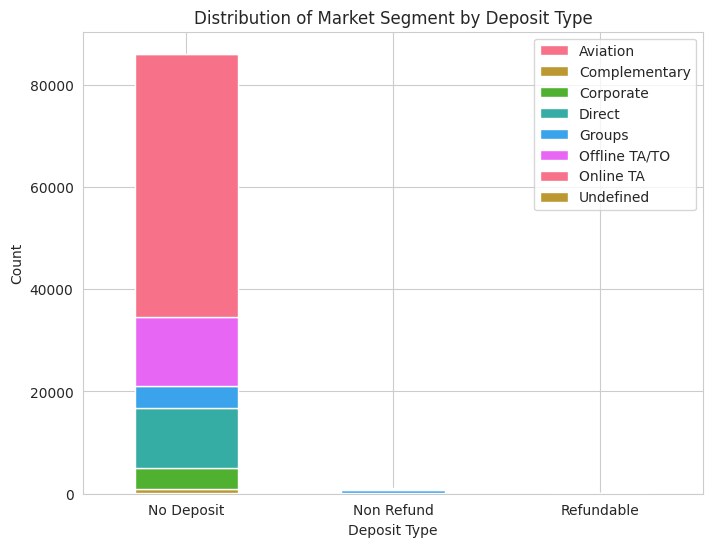

In [ ]:
# Chart - 12 visualization code
# Creating a pivot table with counts of Market Segment by Deposit Type
pivot = pd.pivot_table(hotel_bookings_df, index='deposit_type', columns='market_segment', values='hotel', aggfunc='count')

# Creating a stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribution of Market Segment by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

* Stacked bar charts help to display the distribution of a variable (in this case, the count of bookings) across categories (in this case, market segments) while also showing the composition of each category (in this case, the deposit types).

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the distribution of market segments by deposit type in a stacked bar chart. The chart indicates that the majority of bookings for both types of deposit (non-refundable and refundable) are made by the Online Travel Agents (OTAs) market segment, followed by the Direct, Groups, Corporate, Complementary, and Undefined market segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight gained from this chart is that the OTA market segment dominates the bookings for both non-refundable and refundable deposits. This information can help hotel managers and marketers understand the booking patterns of different market segments and optimize their marketing strategies accordingly. For instance, hotels may want to focus on developing partnerships with OTAs to increase their online visibility and attract more bookings.

#### Chart - 13: Which hotel type has higer ADR?

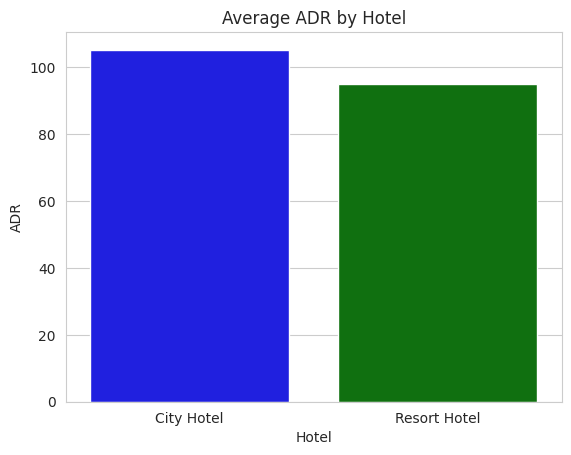

In [ ]:
# Chart - 13 visualization code
# Creating a dataframe with the average ADR per hotel
adr_by_hotel = df.groupby('hotel')['adr'].mean().reset_index()

# Defining the colors for each hotel
colors = {'City Hotel': 'blue', 'Resort Hotel': 'green'}

# Creating the bar plot
sns.barplot(x='hotel', y='adr', data=adr_by_hotel, palette=colors)

# Adding titles and labels
plt.title('Average ADR by Hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts allows us to compare the values of the two variables.

##### 2. What is/are the insight(s) found from the chart?

* From the above chart we can see that the ADR of City Hotels is more than Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this chart can help create a positive business impact by informing pricing strategies and marketing efforts. For example, if the City Hotel wants to target high-end customers, they can use the higher ADR to their advantage by emphasizing the exclusive and luxurious experience they offer.

#### Chart - 14: How is the ADR variating throughout the months and years?

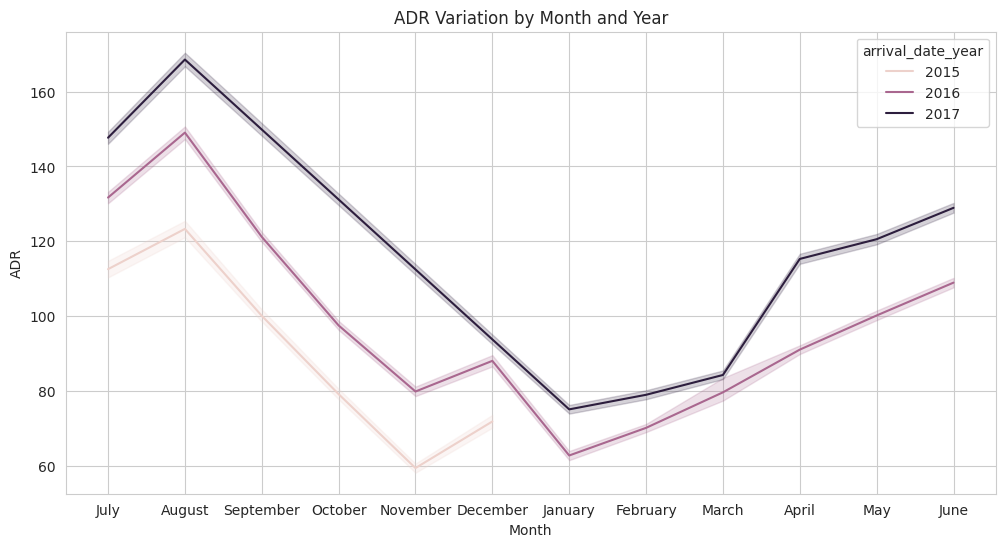

In [ ]:
# Chart - 14 visualization code

plt.figure(figsize=(12,6))
sns.lineplot(data=hotel_bookings_df, x='arrival_date_month', y='adr', hue='arrival_date_year')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('ADR Variation by Month and Year')
plt.show()

##### 1. Why did you pick the specific chart?

* This chart include the ability to visualize trends in ADR over time, identify seasonal patterns, and compare ADR across different years.

##### 2. What is/are the insight(s) found from the chart?

* ADR tends to be highest in the summer months (June-August) and lowest in the winter months (December-February).
* There appears to be a cyclical pattern in ADR, with peaks and troughs repeating over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Hotels can adjust their pricing during peak seasons to maximize revenue or allocate more resources during busier months.

#### Chart - 15: How is the ADR variating with Customer Type?

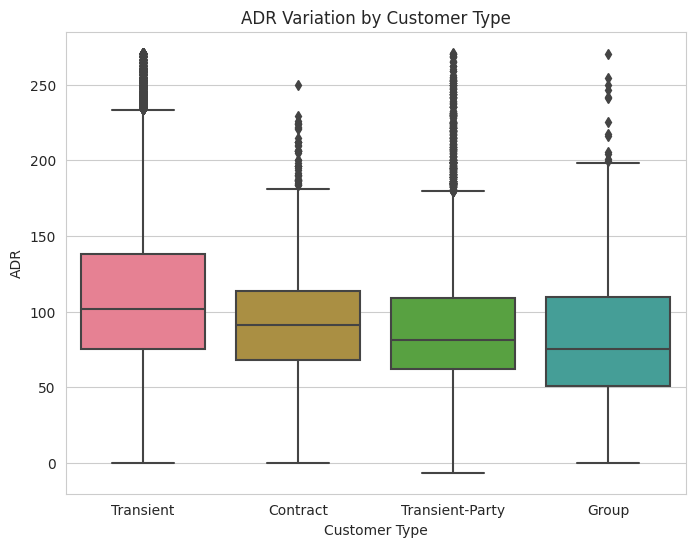

In [ ]:
# Chart - 15 visualization code
# Removing outliers
# Calculating z-scores for ADR
z_scores = stats.zscore(hotel_bookings_df['adr'])

# Identifing outliers as data points with z-score greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Removing outliers from dataframe
cADR_df = hotel_bookings_df[~outliers]

# Plotting boxplot with filtered ADR
plt.figure(figsize=(8, 6))
sns.boxplot(x='customer_type', y='adr', data = cADR_df)
plt.title('ADR Variation by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.show()

##### 1. Why did you pick the specific chart?

* Box plot chart helps to compare the distribution of ADR across different customer types, identify any differences in ADR between customer types, and understand the range and spread of ADR values within each customer type.

##### 2. What is/are the insight(s) found from the chart?

* Transient customers tend to have the highest median ADR, followed by Contract and Transient customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights could potentially help hotels with customer segmentation and pricing strategies. For example, hotels may want to adjust their pricing for Contract and Transient customers to ensure that they are not overpaying relative to other customer types, or to target marketing efforts towards high-spending customer segments.

#### Chart - 16: What is the percentage of bookings made per year in diffrent hotel?

In [ ]:
# Function to show percentage in countplot
def bar_perc(df,Cvar,axis):

    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[Cvar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = axis.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            axis.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

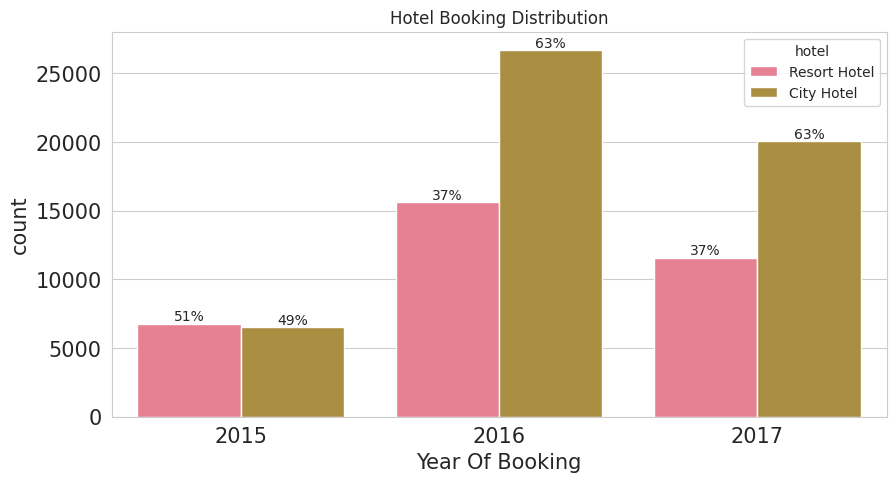

In [ ]:
# Chart - 16 visualization code

# Plotting count plot to show distribution of booking among Resort Hotels and City Hotels for all three years
plt.figure(figsize=(10,5))
ax=sns.countplot (x= 'arrival_date_year', data= hotel_bookings_df, hue= 'hotel')
plt.xticks(size=15)
plt.xlabel('Year Of Booking',size=15)
plt.yticks(size=15)
plt.ylabel('count',size=15)
plt.title("Hotel Booking Distribution")
bar_perc(hotel_bookings_df,"arrival_date_year",ax)

##### 1. Why did you pick the specific chart?

* The chart shows the distribution of hotel bookings between Resort and City hotels for all three years.

##### 2. What is/are the insight(s) found from the chart?

* The number of bookings for both Resort and City hotels have increased over the years.

* City hotels have consistently higher bookings compared to Resort hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The hotel management can focus on promoting Resort hotels to increase their bookings, or they can consider reducing the number of rooms for Resort hotels to optimize resource utilization.

* There is an overall decrease in the number of bookings made in 2017.

#### Chart - 17: What are the number of cancellations made per year in diffrent hotel types.

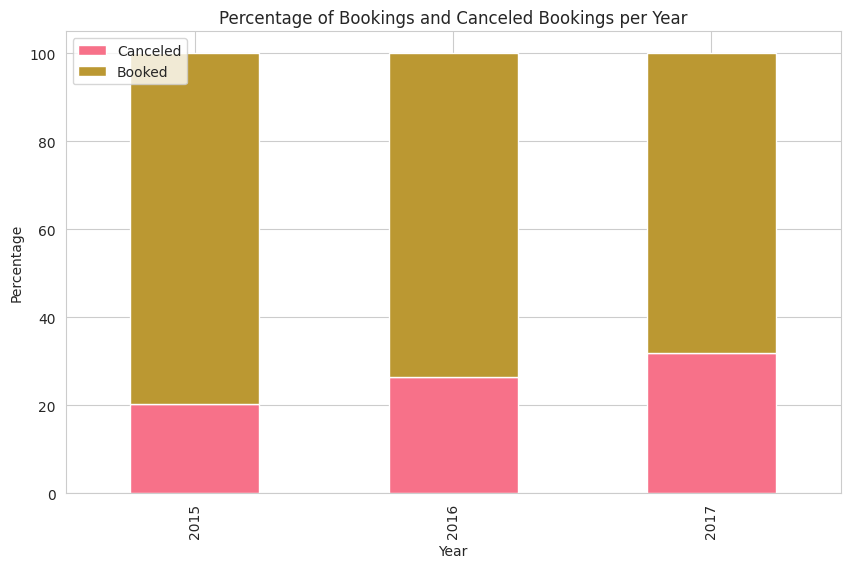

In [ ]:
# Chart - 17 visualization code

# Grouping data by arrival_date_year and is_canceled columns and count the occurrences
bookings_per_year = hotel_bookings_df.groupby(['arrival_date_year', 'is_canceled']).size().unstack()

# Calculating percentage of canceled bookings and bookings made per year
bookings_per_year['total'] = bookings_per_year[0] + bookings_per_year[1]
bookings_per_year['canceled_percentage'] = (bookings_per_year[1] / bookings_per_year['total']) * 100
bookings_per_year['booked_percentage'] = (bookings_per_year[0] / bookings_per_year['total']) * 100

# Creating a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bookings_per_year[['canceled_percentage', 'booked_percentage']].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage of Bookings and Canceled Bookings per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend(['Canceled', 'Booked'], loc='upper left')

# Addingp ercentage labels on top of the bars
for i, c in enumerate(bookings_per_year.columns[:-3]):  # Exclude the last 3 columns (total and percentage columns)
    for index, value in bookings_per_year.iterrows():
        ax.annotate(f"{value[c]:.1f}%", (index, value['total']),
                    ha='center', va='bottom', color='white', fontsize=8,
                    xytext=(0, 10), textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart provide a visual representation of the relationship between two variables, helping identify patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* There is a constant increaase in number of cancellations made by customers through the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The constant increase in the number of cancellations suggests negative growth as the number of cancellations is steady. It could be due to an increase in the number of bookings yet measures should be taken to decrease the number of cancellations.

#### Chart - 18: Which hotel type had the most cancellations?

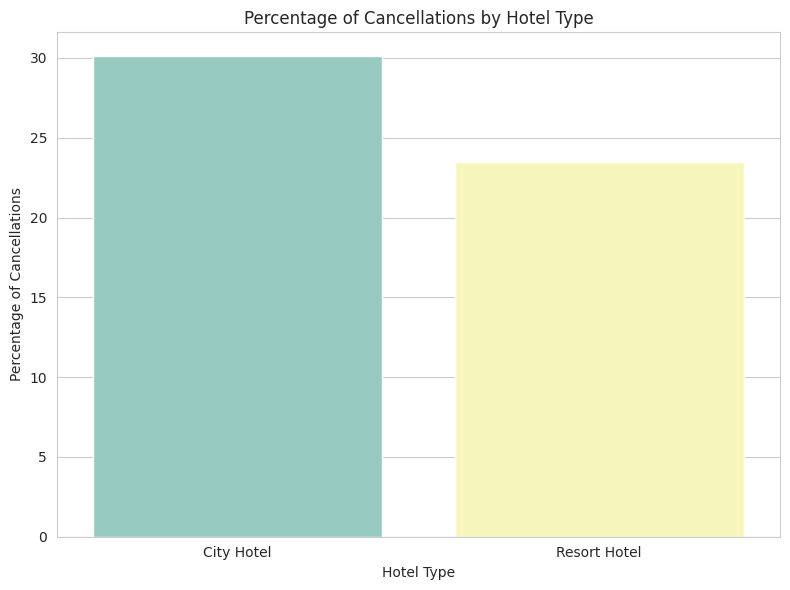

In [ ]:
# Chart - 18 visualization code

# Grouping by 'hotel' and Calculating the percentage of cancellations
hotel_cancel_percent = hotel_bookings_df.groupby('hotel')['is_canceled'].mean() * 100

# settingup the figure size
plt.figure(figsize=(8, 6))

# Creating a bar plot
sns.barplot(x=hotel_cancel_percent.index, y=hotel_cancel_percent.values, palette='Set3')

# setting labels and title
plt.xlabel('Hotel Type')
plt.ylabel('Percentage of Cancellations')
plt.title('Percentage of Cancellations by Hotel Type')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart provide a visual representation of the relationship between two variables, helping identify patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* City Hotels hae more number of cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The bussniess should look into why the cancellations percentage is so high for resort hotels even though the less number of bookings made in it.

#### Chart - 19: Which agents had the most cancellations?

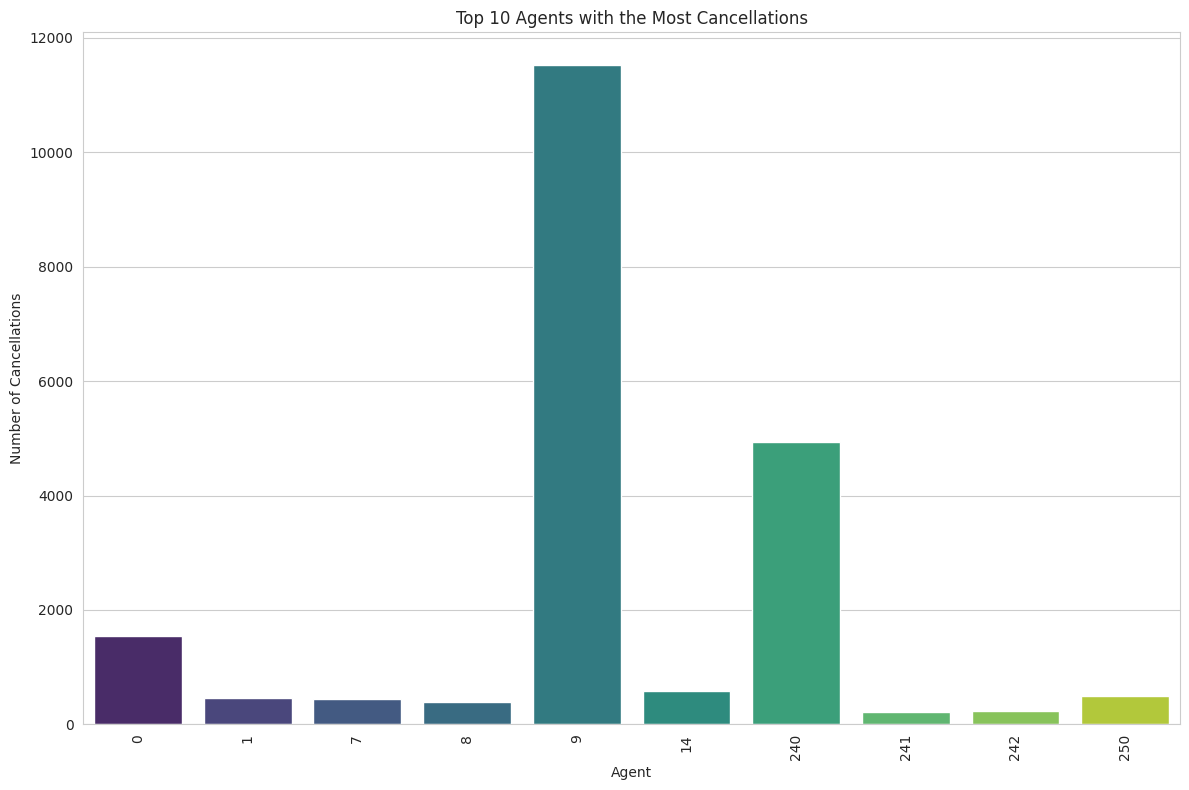

In [ ]:
# Chart - 19 visualization code

# Filtering only canceled bookings
canceled_bookings_df = hotel_bookings_df[hotel_bookings_df['is_canceled'] == 1]

# Grouping by 'agent' and count the canceled bookings
agent_cancel_counts = canceled_bookings_df['agent'].value_counts()

# Removing outliers (agents with very few cancellations)
top_agents = agent_cancel_counts[agent_cancel_counts >= agent_cancel_counts.quantile(0.75)]

# selecting the top 10 agents
top_agents = top_agents.head(10)

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Creating a bar plot
sns.barplot(x=top_agents.index, y=top_agents.values, palette='viridis')

# Setting labels and title
plt.xlabel('Agent')
plt.ylabel('Number of Cancellations')
plt.title('Top 10 Agents with the Most Cancellations')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart provide a visual representation of the relationship between two variables, helping identify patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* Agent 9 and 240 ha sthe most number of cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Bussiness should look into why the cancellations are being made and the high number of cancelations could also be due to the fact that agent 9 and 240 had themost number of bookings.

#### Chart - 20: Which country made the most cancellations?

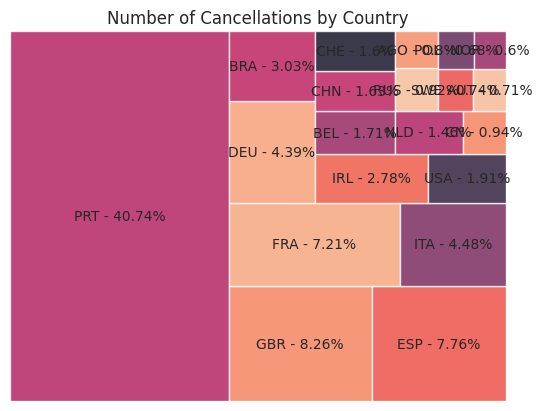

In [ ]:
# Chart - 20 visualization code
# Counting number of cancellations per country
cancelations_by_country = hotel_bookings_df[hotel_bookings_df['is_canceled'] == 1].groupby('country').size().reset_index(name='count')

# Sorting by number of cancellations in descending order
cancelations_by_country.sort_values('count', ascending=False, inplace=True)

# Calculating percentage of cancellations
cancelations_by_country['percentage'] = cancelations_by_country['count'] / cancelations_by_country['count'].sum()

# Creating a treemap chart
squarify.plot(sizes=cancelations_by_country['count'][:20], label=cancelations_by_country['country'][:20] + ' - ' + round(cancelations_by_country['percentage'][:20]*100, 2).astype(str) + '%', alpha=.8)

# Setting chart title
plt.title('Number of Cancellations by Country')

# Removing axis ticks
plt.axis('off')

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

* The use of a treemap chart allows for a clear comparison of the size of cancellation numbers between countries.

##### 2. What is/are the insight(s) found from the chart?

* Portugal has the highest number of cancellations followed by United Kingdom (GBR) and Spain, and that these three countries account for the majority of cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Hotels could offer more flexible cancellation policies or improve communication with guests to better understand their needs and expectations, which may help to reduce cancellations and increase customer satisfaction.

#### Chart - 21: Which market segment had the most number of cancellations?

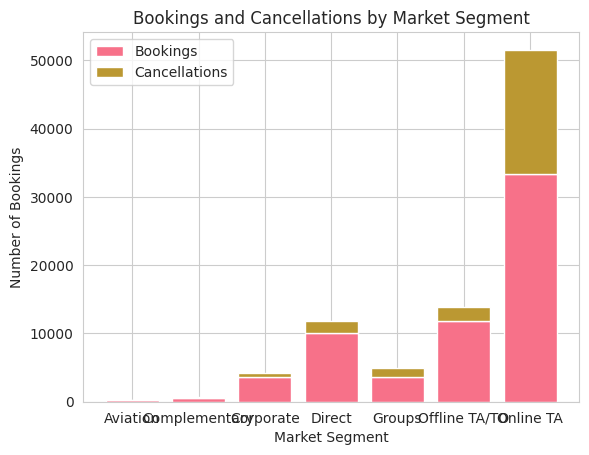

In [ ]:
# Chart - 21 visualization code

# Grouping the data by market segment and is_canceled, and count the number of bookings in each group
booking_counts = hotel_bookings_df.groupby(['market_segment', 'is_canceled'])['hotel'].count().reset_index(name='count')

# Pivoting the data to Creating separate columns for bookings and cancellations
booking_counts_pivot = booking_counts.pivot(index='market_segment', columns='is_canceled', values='count').reset_index()

# Creating a stacked bar chart showing the number of bookings and cancellations for each market segment
plt.bar(booking_counts_pivot['market_segment'], booking_counts_pivot[0], label='Bookings')
plt.bar(booking_counts_pivot['market_segment'], booking_counts_pivot[1], bottom=booking_counts_pivot[0], label='Cancellations')

# Setting chart title and axis labels
plt.title('Bookings and Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend()

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

* The use of a stacked bar chart makes it easy to see the proportion of cancellations within each market segment and to compare the cancellation rates between segments.

##### 2. What is/are the insight(s) found from the chart?

* The insights gained from the chart are that the majority of cancellations occur in the 'Online TA' and 'Groups' market segments, with the 'Online TA' segment having the highest number of cancellations.

* The chart also shows that the 'Direct' and 'Corporate' market segments have the lowest cancellation rates, indicating that hotels may want to focus on attracting more bookings from these segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights can help create a positive business impact by allowing hotels to tailor their marketing and sales efforts towards the market segments that have lower cancellation rates, such as 'Direct' and 'Corporate'.

*  Hotels can analyze the reasons behind the high cancellation rates in the 'Online TA','Offline TA' and 'Groups' segments and take steps to address those issues, such as improving communication with guests or offering more flexible cancellation policies.

#### Chart - 22: What is the cancellation rate by guest type?

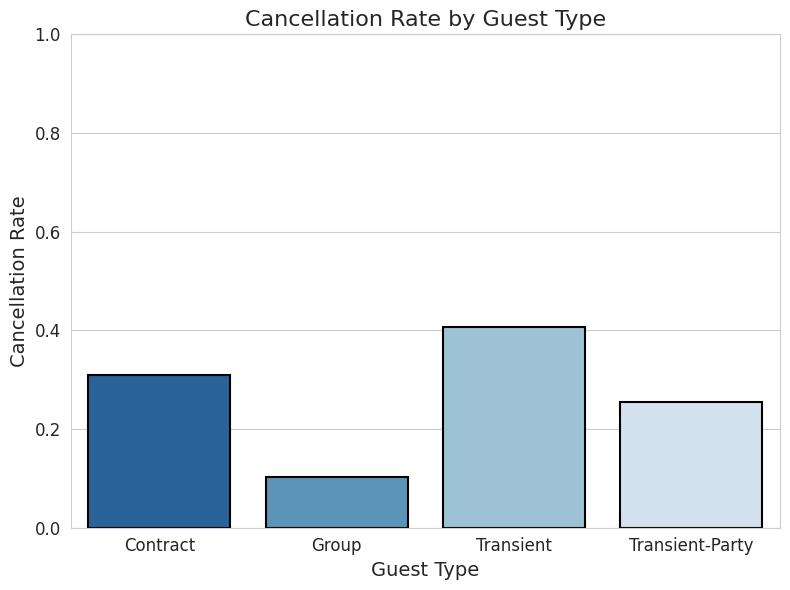

In [ ]:
# Setting Seaborn style
sns.set_style('whitegrid')

# Grouping by 'customer_type' and calculating the average of 'is_canceled'
cancellation_rate_by_guest_type = df.groupby('customer_type')['is_canceled'].mean().reset_index()

# Creating a bar chart with custom colors and font size
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_type', y='is_canceled', data=cancellation_rate_by_guest_type,
            palette='Blues_r', edgecolor='k', linewidth=1.5)
plt.title('Cancellation Rate by Guest Type', fontsize=16)
plt.xlabel('Guest Type', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* The bar chart provides a clear and concise representation of the cancellation rate for each guest type, making it easy to interpret and understand the comparison between different guest types.

##### 2. What is/are the insight(s) found from the chart?

* The cancellation rate is higher for transient guests compared to other guest types, as evident from the higher bar for 'Transient' on the chart.

* The cancellation rate is relatively lower for group guests, followed by contract and transient-party guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The hotel management should focus on reducing cancellations among transient guests, which seem to be the most significant source of cancellations. They can implement strategies to incentivize or encourage transient guests to complete their bookings, such as offering special discounts or promotions, improving customer service, or providing personalized offers.

#### Chart - 23: What are the chances of cancellation based on previous cancellations?

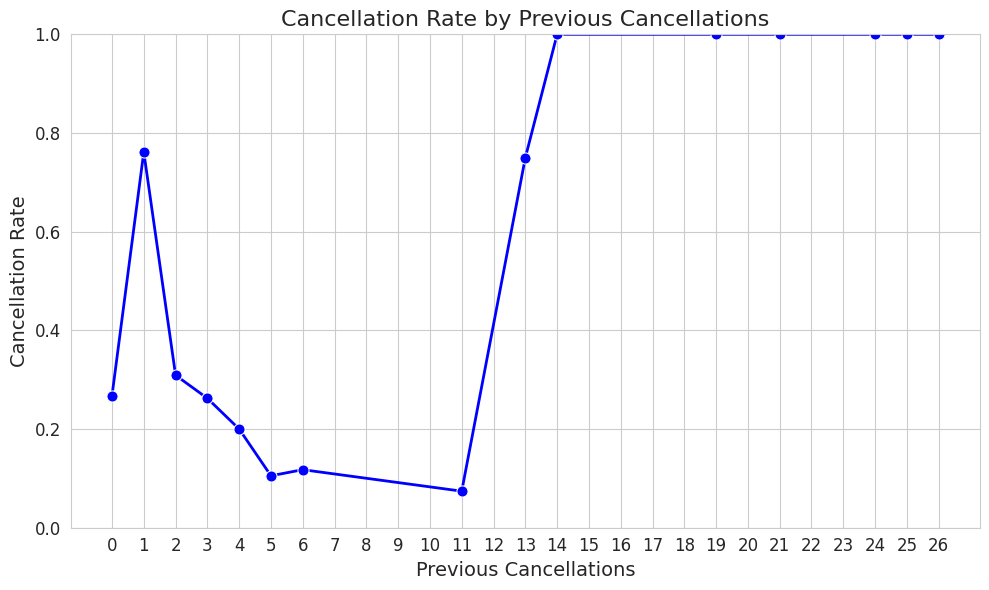

In [ ]:
# Setting Seaborn style
sns.set_style('whitegrid')

# Grouping by 'previous_cancellations' and calculating the average of 'is_canceled'
cancellation_rate_by_previous_cancellations = hotel_bookings_df.groupby('previous_cancellations')['is_canceled'].mean().reset_index()

# Creating a line chart with markers
plt.figure(figsize=(10, 6))
sns.lineplot(x='previous_cancellations', y='is_canceled', data=cancellation_rate_by_previous_cancellations,
             marker='o', markersize=8, color='b', linewidth=2)
plt.title('Cancellation Rate by Previous Cancellations', fontsize=16)
plt.xlabel('Previous Cancellations', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.xticks(range(0, max(cancellation_rate_by_previous_cancellations['previous_cancellations']) + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Line charts help in clearly representing the trends, comparison of multiple data points and gives a visual representaion of relationships and correlations.

##### 2. What is/are the insight(s) found from the chart?

* Cancellation rate is high for a single person booking and maximum for bokings made for a group of people more than 11.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Since most of the cancellations are done by bookings made by a single guest or a group of people the business can optimize their booking and cancellation policies, improve customer retention strategies, offer incentives to rebook, or enhance customer service, which can ultimately result in increased revenue, customer satisfaction, and loyalty.

#### Chart - 24: How is the number of cancelleations affected by ADR?

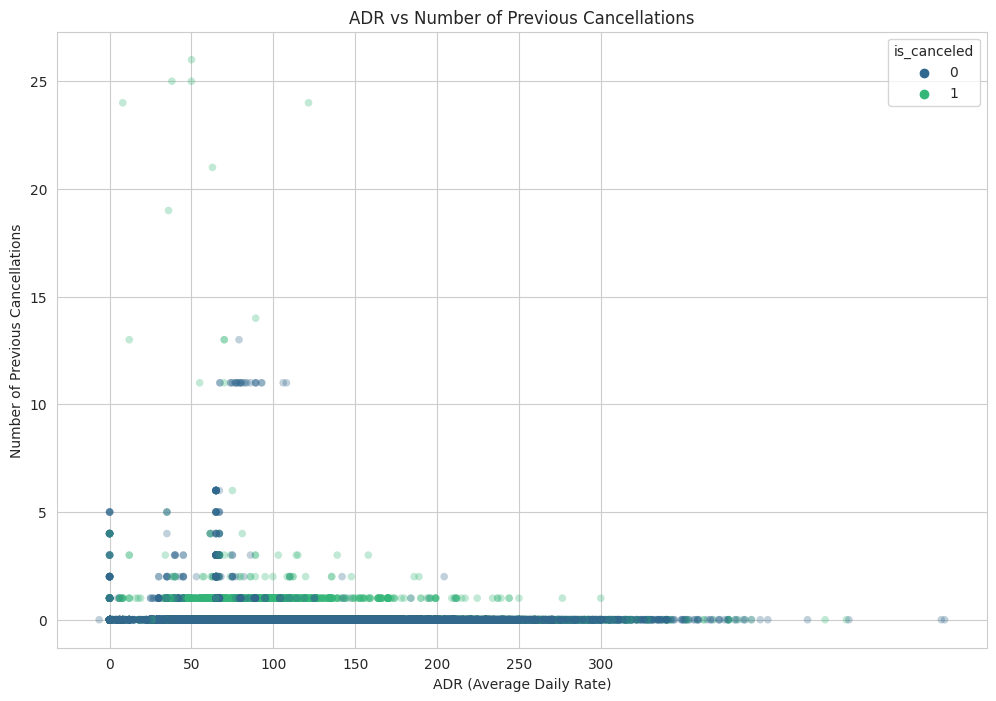

In [ ]:
# Chart - 24 visualization code

# Filtering out ADR values
hotel_bookings_df_filtered = hotel_bookings_df[hotel_bookings_df['adr'] < 5000]

# Setting figure size
plt.figure(figsize=(12, 8))

# Creating a scatter plot with smaller dots for cancelled bookings
sns.scatterplot(x='adr', y='previous_cancellations', data=hotel_bookings_df_filtered, hue='is_canceled',
                palette='viridis', alpha=0.3, s=30, linewidth=0, edgecolor=None, marker='o')

# Setting labels and title
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Number of Previous Cancellations')
plt.title('ADR vs Number of Previous Cancellations')

# Setting additional ticks on x-axis for better representation
plt.xticks(ticks=[0, 50, 100, 150, 200, 250, 300])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

* Scatter plots provide a visual representation of the relationship between two variables, helping identify patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* ADR decreases with increase in number of cancellations made by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Strategies should be implemented inorder to reduce the number of cancellations since the higher number of cancelations is leading to lower ADR which will decrease the ammount of revenue collected.

# ***Multivariate Analysis***

#### Chart - 25: What is the correlation between an assigned room and reserved room type for cancellations made?

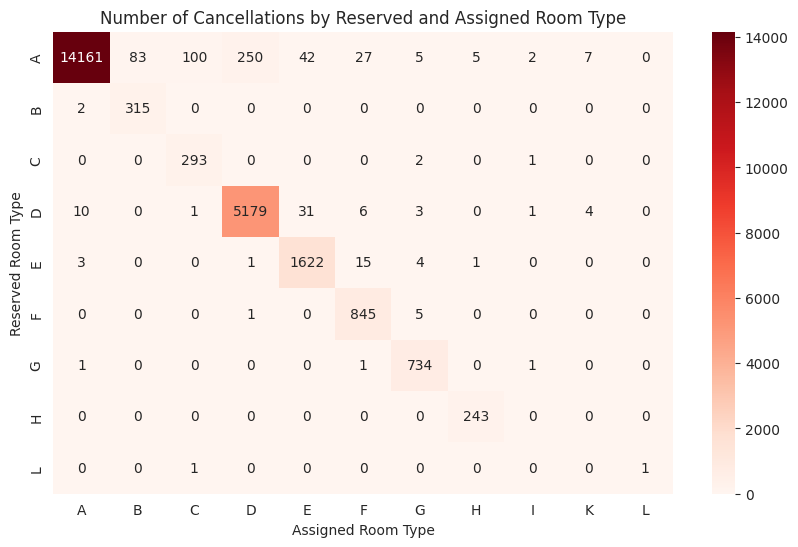

In [ ]:
# Chart - 25 visualization code

# Creating a new DataFrame with only the relevant columns
room_types_df = hotel_bookings_df[['is_canceled', 'reserved_room_type', 'assigned_room_type']]

# Grouping the data by room types and count the number of cancellations
room_types_cancelled = room_types_df[room_types_df['is_canceled'] == 1].groupby(['reserved_room_type', 'assigned_room_type']).count()

# Creating a pivot table to get the data in the right format for plotting
pivot_table = pd.pivot_table(room_types_cancelled, values='is_canceled', index=['reserved_room_type'], columns=['assigned_room_type'], fill_value=0)

# Creating a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='g')
plt.title('Number of Cancellations by Reserved and Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.show()


##### 1. Why did you pick the specific chart?



*   By using a heat map we have a heatmap showing the number of cancellations based on the reserved and assigned room types.




##### 2. What is/are the insight(s) found from the chart?



*   There are a number of cancellations when a diffrent room is assigned from the one been ooked by the customer.
*   Most of the cancellations are done when A C D E F type of rooms are assigned.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   The bussiness must look into the quality of room A C D E since those are getting the most cancellations




#### Chart - 26: Is there a relationship between cancellation, car parking space, and special requests?

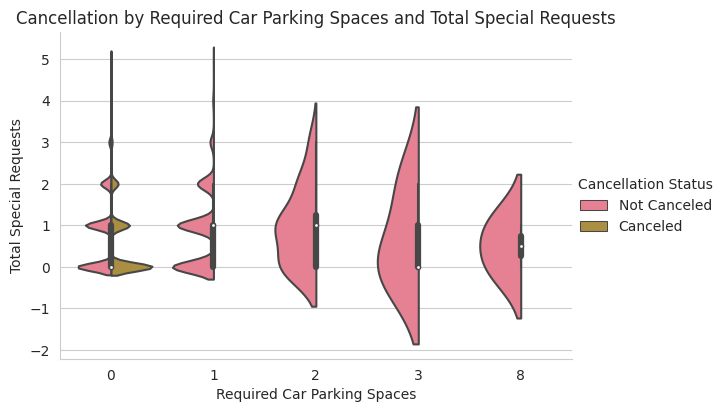

In [ ]:
# Chart - 26 visualization code
sns.set_style("whitegrid")
g = sns.catplot(data=hotel_bookings_df.replace({"is_canceled": {0: "Not Canceled", 1: "Canceled"}}),
                x="required_car_parking_spaces", y="total_of_special_requests",
                hue="is_canceled", kind="violin", split=True, height=4, aspect=1.5)
g.set_axis_labels("Required Car Parking Spaces", "Total Special Requests")
g._legend.set_title("Cancellation Status")
plt.title("Cancellation by Required Car Parking Spaces and Total Special Requests")
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots help in observing the distribution of numeric data, and are especially useful in making a comparison of distributions between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

Cancellation are unlikely to happen if there are special requets and car parking requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Promoting the services as there are fewer cancellations if there are requirements of special services which seems to be getting good feedback shown by the almost zero cancellation rates.

#### Chart - 27 - Correlation Heatmap

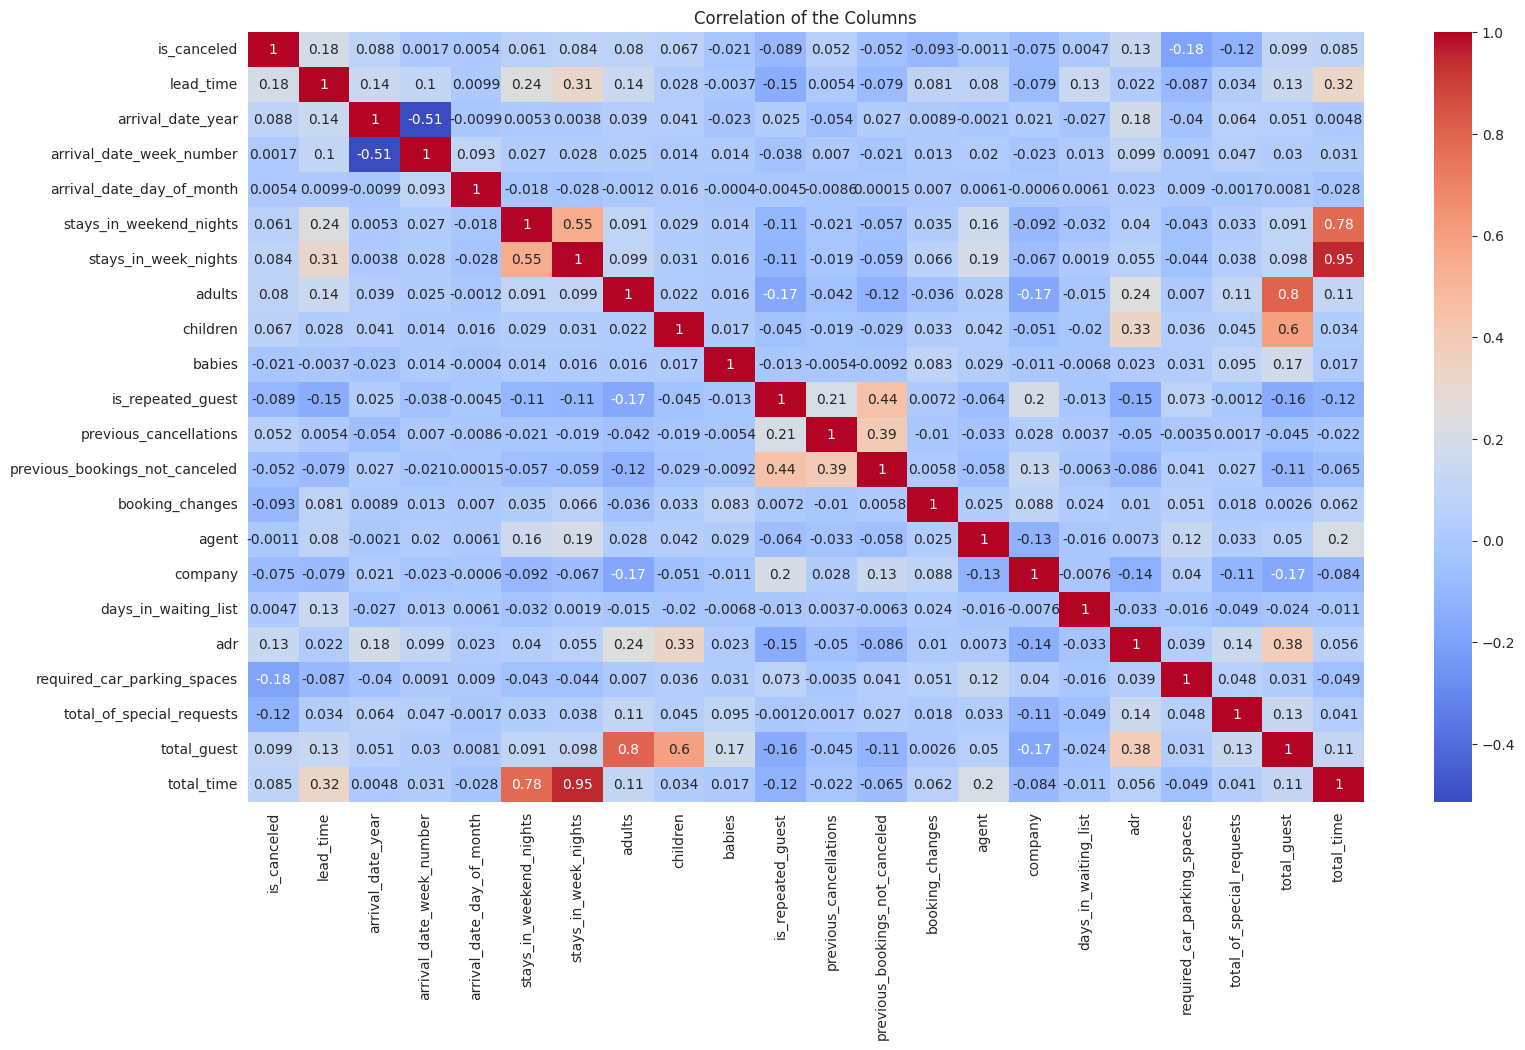

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(hotel_bookings_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation of the Columns')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a powerful visualization tool that shows the correlations between numerical variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

* is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.

*  lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.

* Adults,childrens and babies are corelated to each other. That means more the people more will be adr.

*  is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

#### Chart - 28 - Pair Plot

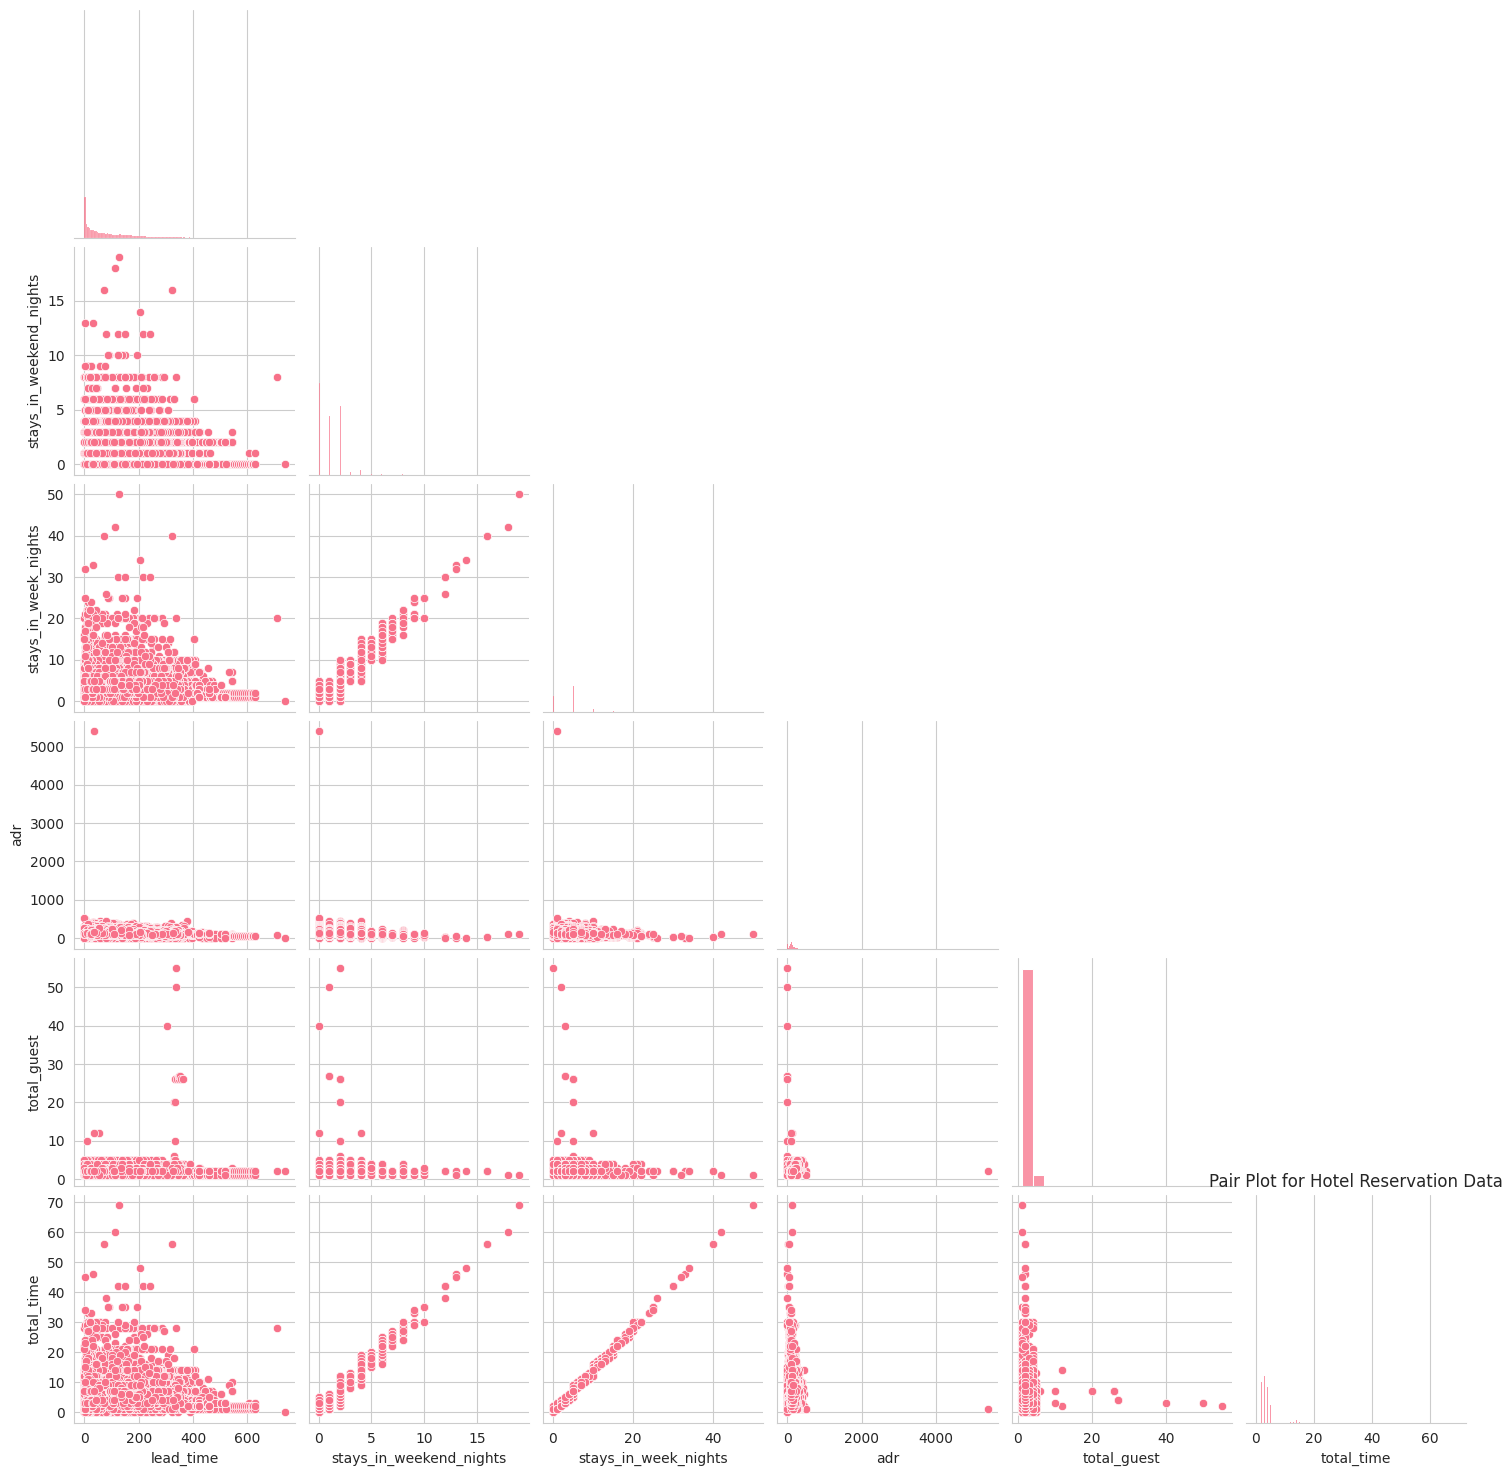

In [ ]:
# Pair Plot visualization code

# Creating a subset of numerical columns
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adr','total_guest','total_time']

# Creating a pairplot
sns.pairplot(data=hotel_bookings_df[numerical_cols], corner=True)
plt.title('Pair Plot for Hotel Reservation Data')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to visualize the pairwise relationships between numerical columns in a dataset. It is a grid of scatterplots that displays the relationships between each pair of variables in a dataset. Pair plot is a useful exploratory tool that can help to identify any potential correlations or patterns between the variables. It is particularly useful when dealing with high-dimensional data, where it can be difficult to visually identify relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

1. Lead time vs. total time: The scatter plot between lead time and total time shows that as the lead time increases, so does the total time that a guest spends at the hotel. This suggests that guests who book their stays well in advance tend to have longer stays than those who book closer to the arrival date.

2. ADR vs. total time: The scatter plot between ADR (average daily rate) and total time shows that guests who stay for longer periods of time tend to have lower ADRs. This could indicate that guests who stay longer are given discounted rates or that they negotiate lower rates for their longer stays.

3. ADR vs. total guests: The scatter plot between ADR and total guests shows a weak negative correlation, suggesting that the more guests in a party, the lower the ADR tends to be.

4. Stays in weekend nights vs. stays in week nights: The scatter plot between stays in weekend nights and stays in week nights shows that most guests stay for a combination of both weekend and week nights. This could indicate that guests are primarily booking for leisure purposes rather than business purposes.

5. ADR vs. total guests: The scatter plot between ADR and total guests shows a weak negative correlation, suggesting that the more guests in a party, the lower the ADR tends to be.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* City Hotels are more popular, A D and E type of rooms have more demand. The availability, Quality, and number of these room types must be increased for increased revenue and customers.

* Online TA(Travel Agents) and offline TA are getting the most bookings. Online campaigns and promotions will help boost the customer flow of the hotel.

* Most of the bookings are done from April to August. With most in August. That is 52% of bookings are done during summer and monsoon.

* City hotels have 30% and resort hotels have 24% cancellations in the data provided A and D type rooms have the majority of cancellations.

* Agent 9 has the majority of cancellations that need to be resolved. This could be due to fraud bad behaviour or lack of customer service.

* The hotel management should focus on reducing cancellations among transient guests, which seem to be the most significant source of cancellations. They can implement strategies to incentivize or encourage transient guests to complete their bookings, such as offering special discounts or promotions, improving customer service, or providing personalized offers.

* Customers from portugese account for 40% of cancellations, hotels could offer more flexible cancellation policies or improve communication with guests to better understand their needs and expectations, which may help to reduce cancellations and increase customer satisfaction.

* Hotels should keep their rooms available 30 days before the busy season of summer and monsoon to increase the number of bookings since customers mostly tend to book rooms 30 days of lead time.

* Hoteals can also use dynamic pricing and strategies to increase revenue during this period of lead time before the busy season.

* Most of the cancellations are done by bookings made by a single guest or a group of people the business can optimize its booking and cancellation policies, improve customer retention strategies, offer incentives to rebook, or enhance customer service, which can ultimately result in increased revenue, customer satisfaction, and loyalty.



# **Conclusion**

**Booking and Cancellation Insights:**

* Resort Hotel Emphasis: The business should focus on improving the number of bookings in resort hotels by taking required steps. More resources can be allocated efficiently to city hotels while ensuring a pleasant customer experience in resort hotels.

* Customer Segmentation: Top countries contributing to bookings can be targeted for marketing campaigns to encourage repeat bookings and customer loyalty. However, diversifying efforts to attract guests from various countries is essential to tap into untapped markets.

* Seasonality and Pricing: There's clear seasonality in bookings, with peak periods in summer and troughs in winter. Hotels can adjust prices and allocate resources accordingly during different seasons.

* Agent Relationships: Top 10 agents account for a significant portion of bookings, suggesting a need for strong partnerships to ensure consistent business.

* Cancellation Trends: Efforts should be made to reduce cancellations, which are affecting the Average Daily Rate (ADR) and overall revenue. Offering flexible cancellation policies and improving communication with guests can help.

* Room Type Strategies: Popular room types can be made more available, while targeted promotions can be used to increase bookings for less popular room types.

* Distribution Channels: Understanding the effectiveness of different distribution channels can inform marketing and distribution strategies for optimized bookings.

* Meal Preferences: Understanding guests' meal preferences can help optimize dining offerings, pricing, and marketing strategies.

**Room Type and Booking Patterns Insights:**

* Room Type Preferences: Guests tend to book A D E room types more frequently, which could be due to specific amenities, views, or other factors associated with those room types.

**Age and Booking Insights:**

* Age Impact: There's no significant correlation between age and booking/cancellation patterns, suggesting that age might not be a strong indicator of cancellation behavior.
Lead Time and Booking Insights:

* Lead Time and Total Stay: Longer lead times often correspond to longer stays, indicating that guests who plan ahead tend to stay for extended periods.
ADR and Booking Insights:

* ADR and Total Stay: Longer stays are associated with lower ADRs, indicating potential discounts for longer stays.

* ADR and Group Size: Larger groups tend to have lower ADRs, possibly indicating group discounts or negotiation for better rates.

* Stays in Weekend Nights vs. Week Nights Insights:

* Leisure Preference: Most guests book stays that include both weekend and week nights, implying leisure-oriented bookings rather than business trips.
Agent and Cancellation Insights:

* Cancellation by Agents: Some agents (specifically agent 9) are associated with higher numbers of cancellations, which could indicate areas for improvement in bookings and customer relations.
Market Segment Insights:

* Market Segment Popularity: Identifying the percentage of bookings by market segment can guide marketing and sales strategies tailored to different customer preferences. Here Online TA accounts for a largge percentage of bookings.

*These insights provide valuable information for optimizing various aspects of the hotel business, including marketing, pricing, resource allocation, customer retention, and service improvements. Combining these insights with further analysis and customer feedback will enable the business to make well-informed decisions for continued growth and success.*




